In [1]:
import sys
sys.path.append("/n/fs/xl-diffbia/projects/stable-diffusion")

In [2]:
import os
import cv2
from glob import glob
from PIL import Image
import copy
import math
import argparse
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

import torch
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import make_grid

/n/fs/xl-diffbia/software/anaconda3/envs/latent-diffusion/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
class TxtImg_Gender_Show(Dataset):
    def __init__(
        self, 
        transform, 
        transform_show,
        cfg_w,
        job_name=None,
        gender_label=None,
        exts=['png', 'jpg', 'JPEG']
    ):
        root = os.path.join("../logs/samples/2023-10-12", f"guide_w{cfg_w}")
        if job_name is not None:
            job_prompt = get_job_prompt(job_name, gender_label)
            job_prompt_dir = job_prompt.lower().replace(" ", "_")
            root = os.path.join(root, job_prompt_dir)

        self.samples = []
        for ext in exts:
            self.samples.extend(
                list(glob(
                    os.path.join(root, '**/*.%s' % ext), recursive=True)))
        self.transform = transform
        self.transform_show = transform_show

    def __len__(self):
        return len(self.samples)
        
    def __getitem__(self, index):
        """
        Args:
            index (int): Index
    
        Returns:
            tuple: (sample_show, sample)
        """
        path = self.samples[index]
        sample = Image.open(path).convert('RGB')
        if self.transform_show is not None:
            sample_show = self.transform_show(sample)
        if self.transform is not None:
            sample = self.transform(sample)
        return sample_show, sample

In [4]:
def get_job_prompt(job_name, gender_label=None):
    if gender_label is None:
        return "A photo of a single {} in the center.".format(job_name.lower())
    else:
        assert gender_label == "male" or gender_label == "female", "unspecified gender label"
        return "A photo of a single {} {} in the center.".format(gender_label, job_name.lower())

In [5]:
def show_image_row(image_batch, label_index, nmax=4):
    plt.close() # close previous plot
    fig, ax = plt.subplots(figsize=(16, 16 * nmax))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((image_batch.detach()[:nmax]), nrow=nmax).permute(1, 2, 0))
    if label_index is not None:
        plt.title(f"Text prompt: A photo of a single {job_list[label_index]} in the center.")
    plt.show()

In [6]:
transform_show = transforms.Compose(
                        [
                            transforms.Resize(size=224, interpolation="bicubic", max_size=None, antialias=None),
                            transforms.CenterCrop(size=(224, 224)),
                            transforms.PILToTensor()
                        ]
                    )
transform_show = transforms.PILToTensor() # resolution = 512

In [7]:
batch_size = 10

### software developer

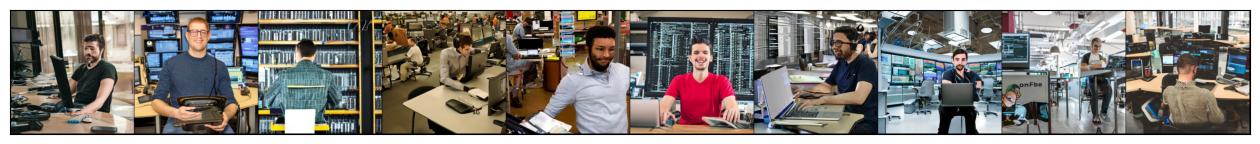

In [106]:
job_name = "software developer"
cfg_w = 2.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.07
show_image_row(image_show, None, nmax=10)

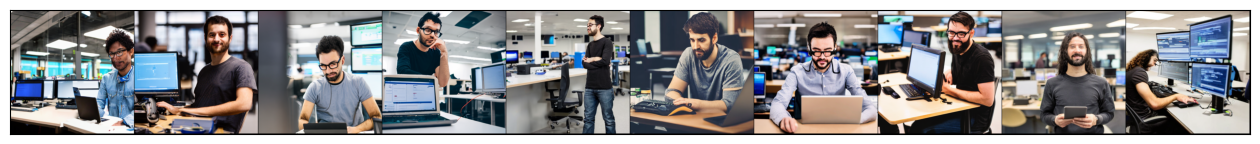

In [107]:
cfg_w = 6.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.022
show_image_row(image_show, None, nmax=10)

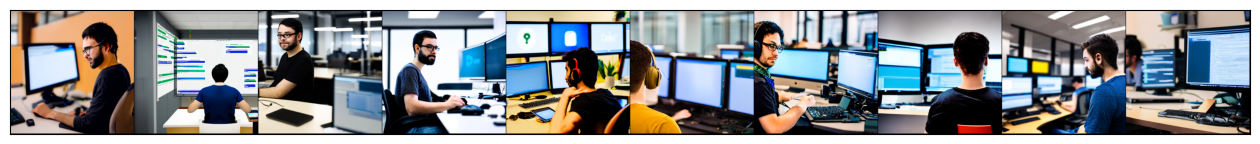

In [108]:
cfg_w = 12.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.014
show_image_row(image_show, None, nmax=10)

### doctor

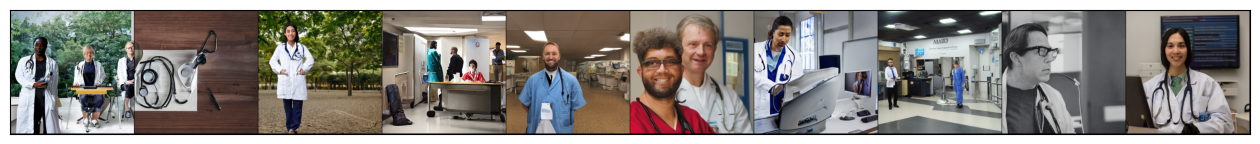

In [41]:
job_name = "doctor"
cfg_w = 2.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.288
show_image_row(image_show, None, nmax=10)

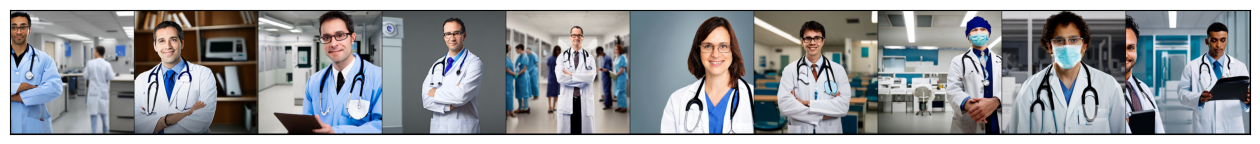

In [42]:
cfg_w = 6.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.236
show_image_row(image_show, None, nmax=10)

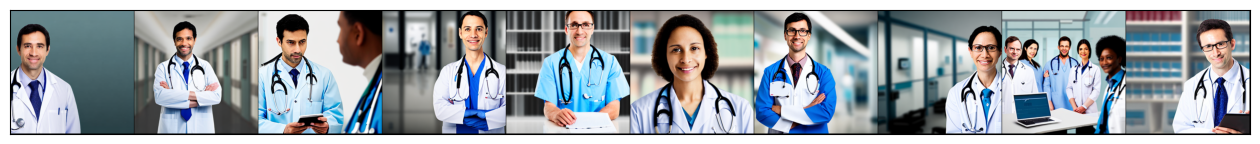

In [44]:
cfg_w = 12.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.264
show_image_row(image_show, None, nmax=10)

## optician

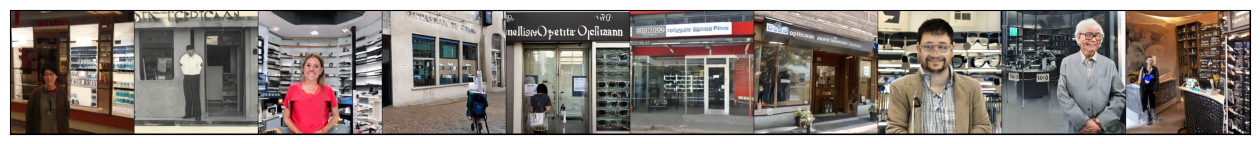

In [124]:
job_name = "optician"
cfg_w = 2.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.362
show_image_row(image_show, None, nmax=10)

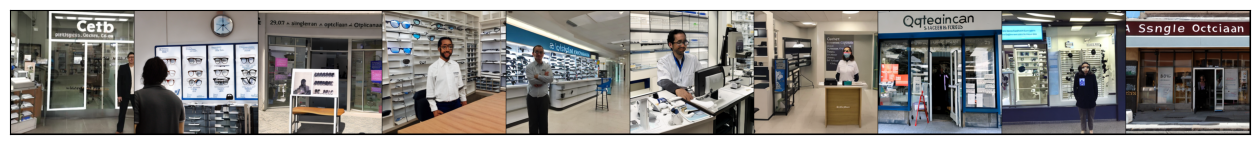

In [125]:
cfg_w = 6.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.34
show_image_row(image_show, None, nmax=10)

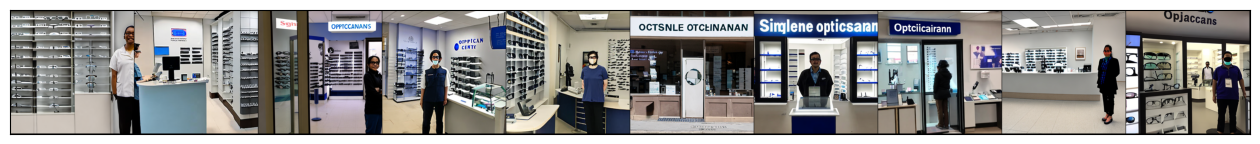

In [126]:
cfg_w = 12.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.314
show_image_row(image_show, None, nmax=10)

### security guard

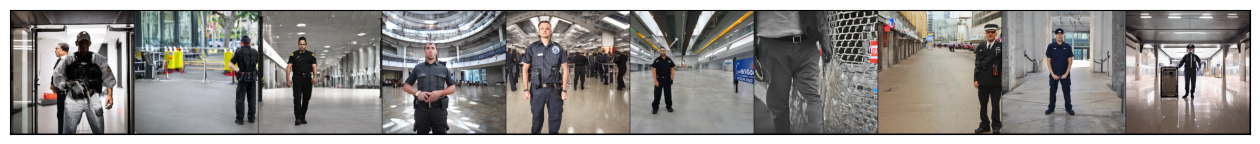

In [8]:
job_name = "security guard"
cfg_w = 2.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.036
show_image_row(image_show, None, nmax=10)

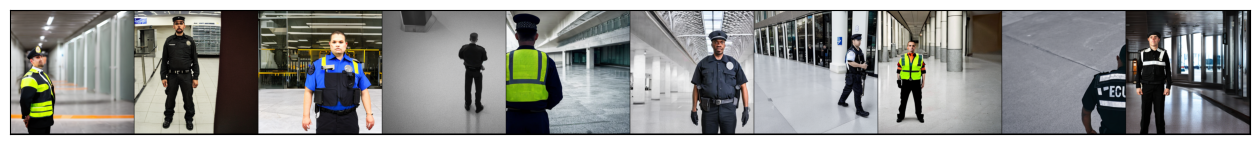

In [9]:
cfg_w = 6.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.014
show_image_row(image_show, None, nmax=10)

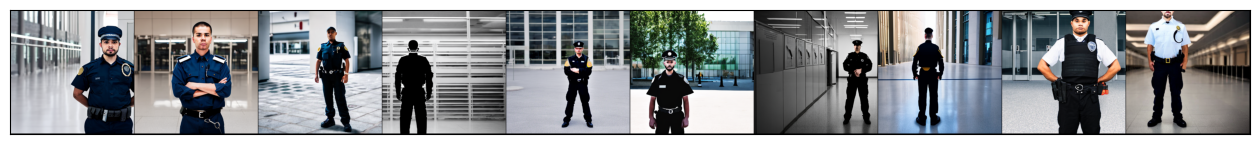

In [10]:
cfg_w = 12.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.018
show_image_row(image_show, None, nmax=10)

### nurse

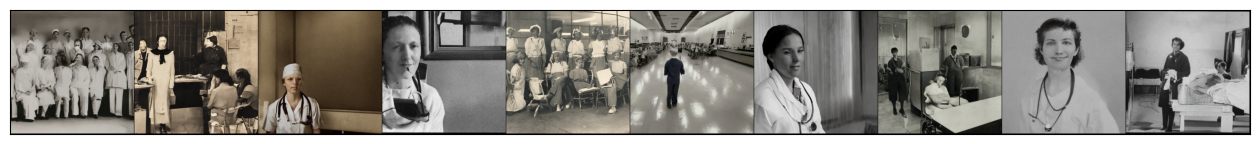

In [139]:
job_name = "nurse"
cfg_w = 2.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.892
show_image_row(image_show, None, nmax=10)

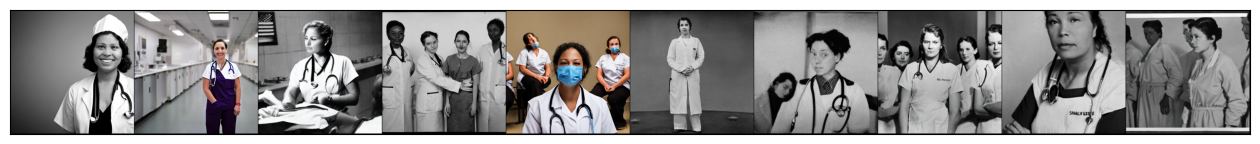

In [140]:
cfg_w = 6.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.97
show_image_row(image_show, None, nmax=10)

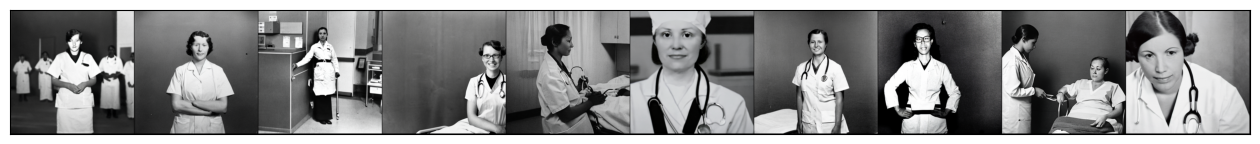

In [141]:
cfg_w = 12.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.982
show_image_row(image_show, None, nmax=10)

## special ed teacher

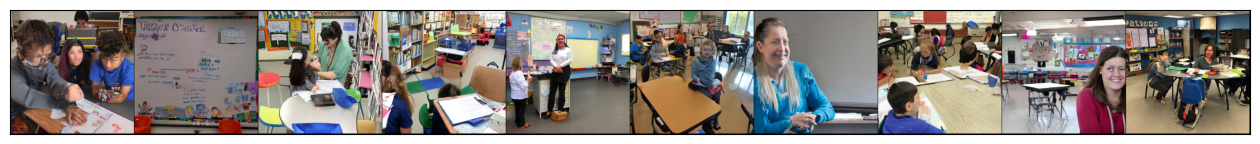

In [171]:
job_name = "special ed teacher"
cfg_w = 2.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.922
show_image_row(image_show, None, nmax=10)

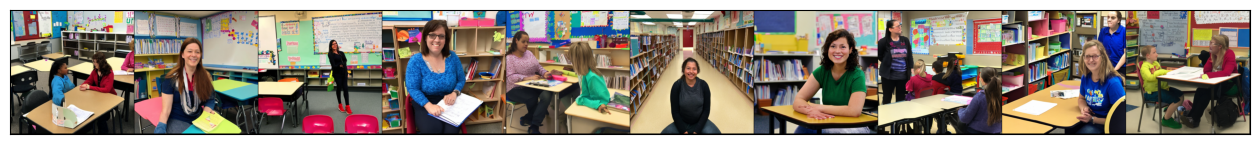

In [172]:
cfg_w = 6.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.974
show_image_row(image_show, None, nmax=10)

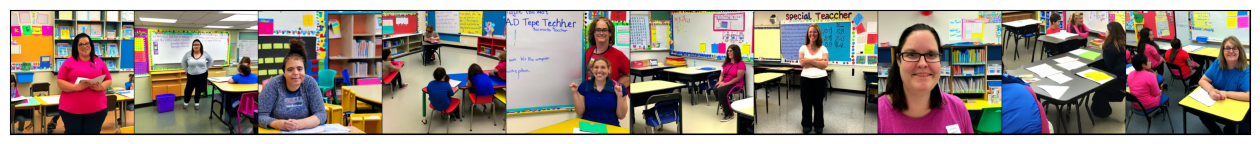

In [173]:
cfg_w = 12.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.99
show_image_row(image_show, None, nmax=10)

### customer service representative

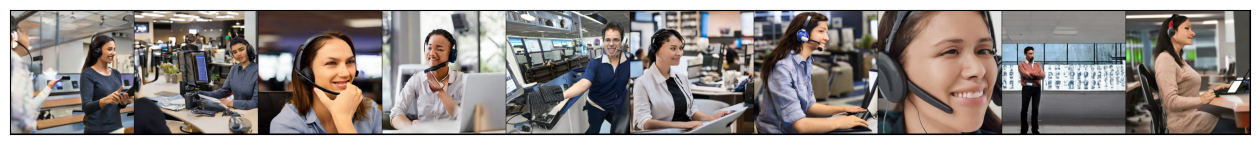

In [166]:
job_name = "customer service representative"
cfg_w = 2.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.792
show_image_row(image_show, None, nmax=10)

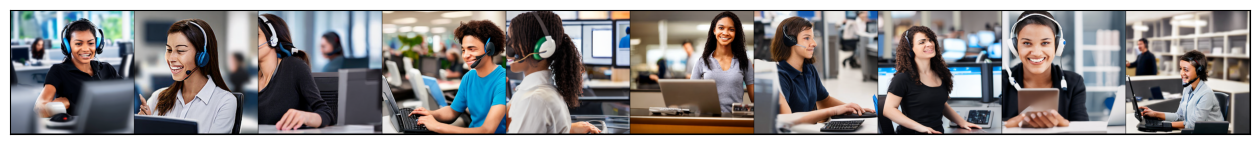

In [167]:
cfg_w = 6.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.94
show_image_row(image_show, None, nmax=10)

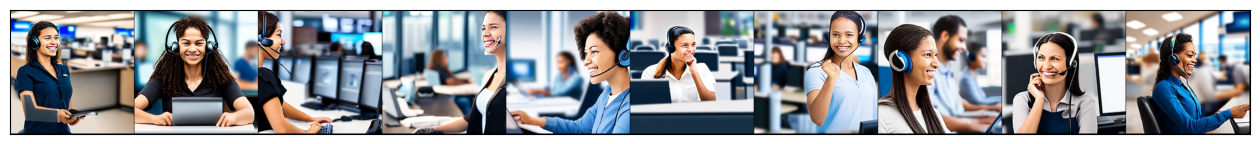

In [170]:
cfg_w = 12.0

# prepare data
txtimg_gen_dataset = TxtImg_Gender_Show(transform = transforms.ToTensor(), transform_show = transform_show, cfg_w = cfg_w, job_name = job_name)
txtimg_gen_dataloader = DataLoader(txtimg_gen_dataset, batch_size = batch_size, shuffle=True, num_workers=4)
image_show, image = next(iter(txtimg_gen_dataloader))

# auto_pred_female = 0.976
show_image_row(image_show, None, nmax=10)